In [2]:
import soil
import networkx as nx
import numpy as np
%pylab inline

from soil import *
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sbn

sbn.set_context("talk", font_scale=1)

import pickle
import os
import pandas as pd
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("talk", font_scale=1)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


# MODEL

In [3]:
from soil.agents import FSM, state, default_state
from soil import Environment
from random import random, shuffle, sample
from itertools import islice
import logging
from enum import Enum
from random import randint
import numpy

class Genders(Enum):
    male = 'male'
    female = 'female'

class Venues(Enum):
    pub = 'pub'
    disco = 'disco'
    street = 'street'


class CityPubs(Environment):
  
    level = logging.DEBUG

    def __init__(self, *args, number_of_pubs=3, number_of_discos=3, number_of_street=3, **kwargs):
                   
                    super(CityPubs, self).__init__(*args, **kwargs)  #Para la clase superior. Constructor super.
                    pubs = {}
                    for i in range(number_of_pubs):
                        newpub = {
                            'name': 'The awesome pub #{}'.format(i),
                            'open': False,
                            'capacity': numpy.random.normal(100,20),
                            'occupancy': 0,
                            'price':randint(5, 8),
                            'type': Venues.pub.value,
                            'entry': 0,
                            'opening_time': 1,
                            'closing_time': randint(20,24),
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_discos):
                        newpub = {
                            'name': 'The awesome disco #{}'.format(i),
                            'open': False,
                            'capacity': numpy.random.normal(1300,300) ,
                            'occupancy': 0,
                            'price':randint(7, 12),
                            'type': Venues.disco.value,
                            'entry': randint(15,20),
                            'opening_time': 10, #ES el10!!
                            'closing_time': randint(32,36),
                        }
                        pubs[newpub['name']] = newpub
                    for i in range(number_of_street):
                        newpub = {
                            'name': 'The awesome street #{}'.format(i),
                            'open': False,
                            'capacity': 10000 ,
                            'occupancy': 0,
                            'price':randint(2,5),
                            'type': Venues.street.value,
                            'entry': 0,
                            'opening_time': 1,
                            'closing_time': 39,
                        }
                        pubs[newpub['name']] = newpub
            
                        
                    self['pubs'] = pubs




    def return_open (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['open']

    def return_occupancy (self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['occupancy']

    def return_price(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['price']

    def return_name(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['name']

    def return_type(self,pub_name):
        if pub_name==None:
            return None
        pub = self['pubs'][pub_name]
        return pub['type']

    def return_opening_time(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['opening_time']

    def return_closing_time(self,pub_name):
        pub = self['pubs'][pub_name]
        return pub['closing_time']

    def set_open(self,pub_name):
        pub = self['pubs'][pub_name]
        pub['open'] = True

    def set_close(self,pub_name):
        pub = self['pubs'][pub_name]
        pub['open'] = False

    def set_capacity(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['capacity'] = number  

    def set_occupancy(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['occupancy'] = number  

    def set_price(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['price'] = number  

    def set_closing_time(self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['closing_time'] = number  

    def set_entry (self,pub_name, number):
        pub = self['pubs'][pub_name]
        pub['entry'] = number  



    def enter(self, pub_name, *nodes):

        '''Agents will try to enter. The pub checks if it is possible'''
    
        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))

        for node in nodes:
            if not pub['open'] or (pub['capacity'] < (len(nodes) + pub['occupancy'])) or node['money']< pub['entry']:

                return False

        pub['occupancy'] += len(nodes) 
        for node in nodes:
            node['pub'] = pub_name
            node['money'] = node['money'] - pub['entry']


        #El líder hace un link con el bar en cuestión self.env.add_edge(self, pub)
        return True

    def available_pubs_total(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']):
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_pubs(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "pub":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_discos(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "disco":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def available_street(self):
        available_venues = []
        for pub in self['pubs'].values():
            if pub['open'] and (pub['occupancy'] < pub['capacity']) and pub['type'] == "street":
                available_venues.append(pub['name'])

        shuffle(available_venues)
        return available_venues 

    def get_venues(self):

        venues = []
        for venue in self['pubs'].values():
            venues.append(venue['name'])
        return venues 

    def reelect_leader(self,*group):
        for node in group:
            node['is_leader']=True
            return
        #Hace un link al bar donde estén



    #Un grupo se va de un pub. La sintaxis "del" es como decir que te vacíe esa variable
    '''
    def exit(self, pub_name, *node_ids):
                    
        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))

        for node_id in node_ids:
            #node = self.get_agent(node_id)
            if pub_name == node_id['pub']:
                del node['pub']
                pub['occupancy'] -= 1


    '''

    def exit(self, pub_name, *nodes):

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))
        for node in nodes:
            pub['occupancy'] -= 1


    def exit_single(self, pub_name, agent):

        try:
            pub = self['pubs'][pub_name]
        except KeyError:
            raise ValueError('Pub {} is not available'.format(pub_name))
        pub['occupancy']-=1
        agent['pub']=None

    
    
        


class Patron(FSM):
  
    level = logging.INFO

    defaults = {
        'pub': None,
        'drunk': False,
        'pints': 0,
        'max_pints': 5,
        'in_a_group':False,
        'money':20,
        'is_leader': False,
        'group_size':0,
        'num_of_changes':0,
        'intoxicated': False,
        'going_out_time':10,
        'coming_back_time':16,
        'group_size':0,
        'prob_fight':0,
        'num_of_fights':0,
        'in_a_fight':False,

    }

    @default_state
    @state
    def setting_parameters(self):

    
        '''Setting max_pints'''
        if self['age']==15:
            if self['gender']=="female":
                self['max_pints']=numpy.random.normal(3,0.5) #3 
            else:
                self['max_pints']=numpy.random.normal(4,1) #4 1

        elif self['age']==20:
            if self['gender']=="female":
                self['max_pints']=numpy.random.normal(4,1) #4 1
            else:
                self['max_pints']=numpy.random.normal(6,1) #6 1

        else:
            if self['gender']=="female":
                self['max_pints']=numpy.random.normal(4,1) #4 1
            else:
                self['max_pints']=numpy.random.normal(6,1) #6 1



        '''Setting intoxication_drinkthreshold'''
        self['intoxication_drinkthreshold'] = 2*self['max_pints']
        
        '''Setting money'''
        if self['age']==15:
            if self['gender']=="female":
                self['money']=numpy.random.normal(25,3) #25
            else:
                self['money']=numpy.random.normal(25,5) #25

        elif self['age']==20:
            if self['gender']=="female":
                self['money']=numpy.random.normal(35,7) #35
            else:
                self['money']=numpy.random.normal(40,7) #40
#25
        else:
            if self['gender']=="female":
                self['money']=numpy.random.normal(60,10) #60
            else:#25
                self['money']=numpy.random.normal(65,15) #65



        
        r = random()

        '''Setting coming_back_time'''


        if self['age']==15:

            if r<0.163:
                self['coming_back_time'] = randint(6,9)
                                                
            elif r<0.299:
                                    
                self['coming_back_time'] = randint(10,13)
                                                    
            elif r<0.407:
                                    
                self['coming_back_time'] = randint(14,17)

            elif r<0.543:
                                    
                self['coming_back_time'] = randint(18,21)


            elif r<0.67:
                                    
                self['coming_back_time'] = randint(22,25)

            elif r<0.771:
                                    
                self['coming_back_time'] = randint(26,29)

            elif r<0.863:
                                    
                self['coming_back_time'] = randint(30,33)

            elif r<0.932:
                                    
                self['coming_back_time'] = randint(34,37)

            elif r<0.965:
                                    
                self['coming_back_time'] = randint(38,42)

            else:

                self['coming_back_time'] = randint(6,42)

        elif self['age']==20:

            if r<0.078:
                self['coming_back_time'] = randint(6,9)
                                                
            elif r<0.152:
                                    
                self['coming_back_time'] = randint(10,13)
                                                    
            elif r<0.253:
                                    
                self['coming_back_time'] = randint(14,17)

            elif r<0.409:
                                    
                self['coming_back_time'] = randint(18,21)


            elif r<0.581:
                                    
                self['coming_back_time'] = randint(22,25)

            elif r<0.709:
                                    
                self['coming_back_time'] = randint(26,29)

            elif r<0.811:
                                    
                self['coming_back_time'] = randint(30,33)

            elif r<0.915:
                                    
                self['coming_back_time'] = randint(34,37)

            elif r<0.966:
                                    
                self['coming_back_time'] = randint(38,42)

            else:

                self['coming_back_time'] = randint(6,42)

        else:

            if r<0.082:
                self['coming_back_time'] = randint(6,9)
                                                
            elif r<0.163:
                                    
                self['coming_back_time'] = randint(10,13)
                                                    
            elif r<0.266:
                                    
                self['coming_back_time'] = randint(14,17)

            elif r<0.451:
                                    
                self['coming_back_time'] = randint(18,21)


            elif r<0.604:
                                    
                self['coming_back_time'] = randint(22,25)

            elif r<0.724:
                                    
                self['coming_back_time'] = randint(26,29)

            elif r<0.819:
                                    
                self['coming_back_time'] = randint(30,33)

            elif r<0.908:
                                    
                self['coming_back_time'] = randint(34,37)

            elif r<0.942:
                                    
                self['coming_back_time'] = randint(38,42)

            else:

                self['coming_back_time'] = randint(6,42)

                                    
    
        return self.looking_for_friends



    
    @state
    def looking_for_friends(self):
     
        #ARREGLAR QUE NO ESPERAN LOS PASOS PARA SALIR! Problema de soil, no funcion el self.env.timeout
        

        if(self['in_a_group'] == False):
            self.info('I am looking for friends')
            self['is_leader'] = True
 
            available_friends = list(self.get_agents(drunk=False,
                                                     pub=None,
                                                     in_a_group=False,
                                                     age=self['age']))
                                                     
            if not available_friends or len(available_friends)==1:
                self.info('No encuentro amigos')
                return self.at_home

            befriended = self.try_friends(available_friends)
            if befriended:

                group = list(self.get_neighboring_agents())



                r=random()
                

                if self['age']==15:
                    if(r<0.3963):
                        going_out_time = 2
                    elif(r<(0.3963+0.2642)):
                        going_out_time = randint(3,6)
                    elif(r<(0.3963+0.2642+0.2642)):
                        going_out_time = randint(7,10)
                    else:
                        going_out_time = randint(11,18)

                elif self['age']==20:
                    if(r<0.1519):
                        going_out_time = 2
                    elif(r<(0.1519+0.2658)):
                        going_out_time = randint(3,6)
                    elif(r<(0.1519+0.2658+0.4937)):
                        going_out_time = randint(7,10)
                    else:
                        going_out_time = randint(11,18)

                else:
                    if(r<0.2041):
                        going_out_time = 2
                    elif(r<(0.2041+0.449)):
                        going_out_time = randint(3,6)
                    elif(r<(0.2041+0.449+0.2653)):
                        going_out_time = randint(7,10)
                    else:
                        going_out_time = randint(11,18)

                for friend in group:
                    friend['going_out_time']= going_out_time
                    friend['group_size'] = len(group) +1
                    
               
                self['going_out_time'] = going_out_time
                self['group_size'] =  len(group)+1          
                
                return self.looking_for_pub, self.env.timeout(self['going_out_time']-self.now) 
        else:
            self.debug('{} has a group already' .format(self.id))
            return self.looking_for_pub, self.env.timeout(self['going_out_time']-self.now)

    @state
    def looking_for_pub(self):

        self.debug('Salimos, nuestra hora era {}'.format(self['going_out_time']))

        '''Look for a pub that accepts me and my friends'''
        if self['pub'] != None:
            return self.sober_in_pub

         

        self.debug('I am looking for a pub')
        group = list(self.get_neighboring_agents())

        r=random()
        if(self['age'] == 15):

            if (0.429>r):
                available_pubs = self.env.available_pubs()
                    

            elif ((0.429+0.337)>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        elif(self['age'] == 20):

            if (0.509>r):
                available_pubs = self.env.available_pubs()

            elif (0.509+0.337>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        else:

            if (0.629>r):
                available_pubs = self.env.available_pubs()
                    

            elif ((0.629+0.287)>r):
                available_pubs = self.env.available_discos()

            else:
                available_pubs = self.env.available_street()

        if (len(available_pubs)) == 0:
            available_pubs = self.env.available_pubs()
            self.info('No había discos y me voy mejor a un bar')

        if (len(available_pubs)) == 0:
            
            for friend in group:
                friend.set_state(self.at_home)
                self.info('Tampoco hay bares, así que mejor nos vamos a casa. Soy {}'.format(friend.id))
            
            return self.at_home


        for pub in available_pubs:
            
           
            self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
            if self.env.enter(pub, self, *group):
                self.info('We\'re all {} getting in {}!'.format(len(group)+1, pub))
                capacity = self.env.return_occupancy(pub)
                typebar = self.env.return_type(pub)
                
                '''
                if typebar == "disco":
                    for friend in group:
                        friend['pints']+=2
                        friend['money']-=6
                        self.info('BEBO DOS POR ENTRAR EN DISCO ----------------------------')
                '''

                

                self.info('{} now has {} people inside'.format(pub,capacity))
                return self.sober_in_pub
            else:
                self.info("We can\'t go inside {}".format(pub))

        if (self.env.return_type(available_pubs[0])=="disco") or  (self.env.return_type(available_pubs[0])=="street"):

            available_pubs = self.env.available_pubs()
            
            for pub in available_pubs:
            
                self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
                if self.env.enter(pub, self, *group):
                    self.info('We\'re all {} getting in {}!'.format(len(group)+1, pub))
                    capacity = self.env.return_occupancy(pub)
                    self.info('{} now has {} people inside'.format(pub,capacity))
                    return self.sober_in_pub
                else:
                    self.info("We can\'t go inside {}".format(pub))

            
            for friend in group:
                friend.set_state(self.at_home)
                self.info('No hay bares por donde salir. Nos vamos. Soy {}'.format(friend.id))
            return self.at_home

        else:
            
            for friend in group:
                self.info('No hay bares por donde salir. Nos vamos. Soy {}'.format(friend.id))
                friend.set_state(self.at_home)
            return self.at_home

                
            # Si no puede entrar después de todas la iteraciones dar alternativa dependiendo
            # del caso. Buscan plan de otro tipo, en otro tipo de Venue. Si tampoco pueden, se van a casa
        


    @state
    def sober_in_pub(self):

        group = list(self.get_neighboring_agents())
        at_homes = list(self.get_agents(state_id=Patron.at_home.id))

        '''
        for groupies in group:
            self.info('Miembro del grupo: {}'.format(groupies.id))
        '''
        for at_home in at_homes:
            if at_home in group:
                group.remove(at_home)

        for groupies in at_homes:
            self.info('Estoy at_home: {}'.format(groupies.id))
        '''
        for groupies in group:
            self.info('Pero quitando los at_homes...: {}'.format(groupies.id))
        '''

        pubii = self['pub']

        for member in group:
            self.debug('Este agente está en la lista de group: {}.'.format(member.id))
        
        at_homes = list(self.get_agents(state_id=Patron.at_home.id))

        for at_home in at_homes:
            self.debug('Este agente está en la lista de at_homes: {}.'.format(at_home.id))
            if at_home in group:

                group.remove(at_home)
        

        #Comprobar si hay razón para irse a casa

            #Amigo intoxicado o pelea

        for friend in group:
            if (friend['intoxicated']) or (friend['in_a_fight']):
                r = random()
                if r<0.7:
                    self.info('Mi amigo {} se ha intoxicado o peleado. Me voy'.format(friend.id))
                    
                    self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(self['pub'])))

                    self.env.exit_single(self['pub'],self.get_agent(self.id))

                    self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
                    return self.at_home
                    

                else:
                    self.debug('No ha tocado irse , amigo {} intoxicado/peleado'.format(friend.id))
            

            #Es hora de irse a casa
        if self.now == self['coming_back_time']:

            agente = self.get_agent(self.id)
            self.debug('EL id es: {} '.format(agente.id))
            self.info('Es mi hora de irme a casa')
            
            self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(pubii)))

            self.env.exit_single(self['pub'], self.get_agent(self.id))

            self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
            return self.at_home
            

            # Quedan pocos amigos

        friends_remaining = len(list(self.get_neighboring_agents()))

        

        if ((self['group_size'] * 0.5) >= friends_remaining+1) or (friends_remaining==0):
            self.info('Me voy a casa porque habíamos salido {} y solo quedamos {}'.format(self['group_size'], friends_remaining+1))
            self.env.exit(self['pub'],self, *group)
            for friend in group:
               
                self.info('Ya somos pocos los que quedamos. Me voy, soy {}'.format(friend.id))
                friend.set_state(self.at_home)
            
            #Quizas no es necesario
            #self.env.exit(self['pub'],self, self.get_agent(self.id))
            return self.at_home #Nunca pasa por aquí creo

            #Check if a Patron has had a fight. It goes home

        if self['in_a_fight']:
            
            
            self.info('Me he peleado con alguien y me voy. Soy {}'.format(self.id))
            self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(self['pub'])))

            self.env.exit_single(self['pub'], self.get_agent(self.id))
            self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
            return self.at_home

        #Option of drinking a beverage
        self.drink()
    
        #Set prob_fight

        if self['age']==15 or self['age']==20:
            if self['gender']=="male":
                self['prob_fight']= 0.003 * self['pints']
            else:
                self['prob_fight']= 0.001 * self['pints'] #0.0001

        if self['age']==25:
            if self['gender']=="male":
                self['prob_fight']= 0.002 * self['pints'] 
            else:
                self['prob_fight']= 0.001 * self['pints'] #0.00005

        

        #Option of having a fight
        if self['in_a_fight']==False:
            r = random()
            if r<self['prob_fight']:
            
                self.fight()
        
       
        #Set prob_change_bar

        type = self.env.return_type(self['pub'])
      
        if(type=="disco"):
            self['prob_change_bar'] = 0

        
            


        #Option of changing pub if you are a leader

        if (self['is_leader'] and self['prob_change_bar']>random()) or (self['is_leader'] and not self.env.return_open(self['pub'])):
            self.change_bar()
            

        #Set prob_drink
        if self.now == (self['going_out_time']+4):
            if self['age']==15 or self['age']==20:
                if self['gender']=="male":
                    self['prob_drink']=0.6 #0.6
                else:
                    self['prob_drink']=0.25 #0.25

            if self['age']==25:
                if self['gender']=="male":
                    self['prob_drink']=0.5 #0.5
                else:
                    self['prob_drink']=0.25 #0.25
                


        if self.now == (self['going_out_time']+8):
            if self['gender']=="male":
                self['prob_drink']=0.4 #0.4
            else:
                self['prob_drink']=0.2#0.2

        

        #Check if the Patron is drunk
        if self['pints'] > self['max_pints']:
            self['drunk'] = True
            self.info('I\'m so drunk.')
            return self.drunk_in_pub

        

        


    @state
    def drunk_in_pub(self):
   
        pubii = self['pub']
        group = list(self.get_neighboring_agents())
        at_homes = list(self.get_agents(state_id=Patron.at_home.id))

        for at_home in at_homes:
            if at_home in group:
                group.remove(at_home)
        
        for member in group:
            self.debug('Este agente está en la lista de group: {}.'.format(member.id))
        
        at_homes = list(self.get_agents(state_id=Patron.at_home.id))

        for at_home in at_homes:
            self.debug('Este agente está en la lista de at_homes: {}.'.format(at_home.id))
            if at_home in group:

                group.remove(at_home)
        

        #Comprobar si hay razón para irse a casa

            #Amigo intoxicado o pelea

        for friend in group:
            if (friend['intoxicated']) or (friend['in_a_fight']):
                r = random()
                if r<0.7:
                    self.info('Mi amigo {} se ha intoxicado o peleado. Me voy'.format(friend.id))
                    #self.info('El bar es: {}'.format(self['pub']))
                    self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(self['pub'])))

                    self.env.exit_single(self['pub'],self.get_agent(self.id))

                    self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
                    return self.at_home
                    

                else:
                    self.debug('No ha tocado irse , amigo {} intoxicado/peleado'.format(friend.id))
            

            #Es hora de irse a casa
            
        if self.now == self['coming_back_time']:

            agente = self.get_agent(self.id)
            self.debug('EL id es: {} '.format(agente.id))
            self.info('Es mi hora de irme a casa')
            pubii = self['pub']
            self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(pubii)))

            self.env.exit_single(self['pub'], self.get_agent(self.id))

            self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
            return self.at_home
            # Quedan pocos amigos

        friends_remaining = len(list(self.get_neighboring_agents()))

        

        if ((self['group_size'] * 0.5) >= friends_remaining+1) or (friends_remaining==0):
            self.info('Me voy a casa porque habíamos salido {} y solo quedamos {}'.format(self['group_size'], friends_remaining+1))
            self.env.exit(self['pub'],self, *group)
            for friend in group:
                self.info('Ya somos pocos los que quedamos. Me voy, soy {}'.format(friend.id))
                friend.set_state(self.at_home)
            
            #Quizas no es necesario
            #self.env.exit(self['pub'],self, self.get_agent(self.id))
            return self.at_home #Nunca pasa por aquí creo

            #Check if a Patron has had a fight. It goes home

        if self['in_a_fight']:
            
            self.info('Me he peleado con alguien y me voy. Soy {}'.format(self.id))
            self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(self['pub'])))

            self.env.exit_single(self['pub'], self.get_agent(self.id))

            self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
            return self.at_home



            #Check if the Patron is intoxicated
        if self['pints'] > self['intoxication_drinkthreshold']:
            self['intoxicated'] = True
            self.info('I got intoxicated. I go home: {}'.format(self.id))
            self.info('El bar es: {} y tiene dentro {} personas'.format(self['pub'], self.env.return_occupancy(self['pub'])))

            self.env.exit_single(self['pub'], self.get_agent(self.id))

            self.info(' y ahora  tiene dentro {} personas'.format( self.env.return_occupancy(pubii)))
            return self.at_home


        #Option of drinking a beverage
        self.drink()
    
        #Set prob_fight

        if self['age']==15 or self['age']==20:
            if self['gender']=="male":
                self['prob_fight']= 0.004 * self['pints']
            else:
                self['prob_fight']= 0.002 * self['pints'] #0.0002

        if self['age']==25:
            if self['gender']=="male":
                self['prob_fight']= 0.003 * self['pints']
            else:
                self['prob_fight']= 0.002 * self['pints'] #0.00006

        

        #Option of having a fight
        if self['in_a_fight']==False:
            r = random()
            if r<self['prob_fight']:
            
                self.fight()
        
       
        #Set prob_change_bar

        type = self.env.return_type(self['pub'])
      
        if(type=="disco"):
            self['prob_change_bar'] = 0

      
            


        #Option of changing pub if you are a leader

        if (self['is_leader'] and self['prob_change_bar']>random()) or (self['is_leader'] and not self.env.return_open(self['pub'])):
            self.change_bar()
            

        #Set prob_drink
        if self.now == (self['going_out_time']+4):
            if self['age']==15 or self['age']==20:
                if self['gender']=="male":
                    self['prob_drink']=0.6 #0.6
                else:
                    self['prob_drink']=0.25 #0.25

            if self['age']==25:
                if self['gender']=="male":
                    self['prob_drink']=0.5 #0.5
                else:
                    self['prob_drink']=0.25 #0.25
                


        if self.now == (self['going_out_time']+8):
            if self['gender']=="male":
                self['prob_drink']=0.4 #0.4
            else:
                self['prob_drink']=0.3 #0.3


    
    

    @state
    def at_home(self):
        '''The end'''
        self.info('Life sucks. I\'m home!')
        if self['is_leader']:
            group = list(self.get_neighboring_agents())
            self.env.reelect_leader(*group)

        self['pub']=None
        '''
        if (self['pub']!=None):
            self.info('NO DEBERÍA ENTRAR AQUÍ!. MI bar es el {}'.format(self['pub']))
            
            occupancy = self.env.return_occupancy(self['pub'])
            self.env.set_occupancy(self['pub'], occupancy-1)
            self.debug('El venue tenia {} personas y ahora {}'.format(occupancy, self.env.return_occupancy(self['pub']) ))
            
            
        else:
            self.debug('No tenía bar. Me han debido hacer kick out')
        '''
        self.die(remove=True)

    



    def change_bar(self):

            #Que cambien según itinerarios. Si num_changes=0, cambia dependiendo donde esté. 
            #Bar--> disco 
            #bar-->bar -->bar...
            #Street--> bar -->bar ...
            #Street--> disco
            #De las discoteca no sale nadie
            #Si se intenta cambiar a un sitio y no está disponible, se queda donde está (esto lo que hace es suponer que los agentes
            #se saben los horarios de los sitios)

        self.info('This member is going to change venue: {}'.format(self.id))

        current_pub = self['pub']
        type = self.env.return_type(self['pub'])

        group = list(self.get_neighboring_agents()) #TIene todos los del grupo menos el líder


        self.info('Group tiene {} miembros '.format(len(group)+1))

        self.info('{}'.format(self.id))
        for member in group:
            self.info('{}'.format(member.id))

        for member in group:
            self.debug('Este agente está en la lista de group: {}.'.format(member.id))
        
        at_homes = list(self.get_agents(state_id=Patron.at_home.id))

        for at_home in at_homes:
            self.info('Este agente está en la lista de at_homes: {}.'.format(at_home.id))
            if at_home in group:

                group.remove(at_home)


        self.info('... y ahora tiene {} '.format(len(group)+1))

        r= random()


        #Pensar bien en las posibilidades y ver que hacen si no encuentran el sitio que buscan
        if(type== "disco"):

            available_pubs = self.env.available_discos()


        elif(type== "pub"):

            if self['num_of_changes']>4:
                available_pubs = self.env.available_pubs()

            else:
                r = random()

                if r<0.5 and self.now>=10:

                    available_pubs = self.env.available_discos()
                    
                else:
                    available_pubs = self.env.available_pubs()
                
        
        else:

            if (0.5>r):
                available_pubs = self.env.available_pubs()

            else:
                available_pubs = self.env.available_discos()

        if len(available_pubs) == 0:

            self.info("Nuestro plan se nos ha acabado")
            self.env.exit(self['pub'],self, *group)
            for friend in group:
                friend.set_state(self.at_home)
                self.debug('Mi plan se ha acabado y me voy:{} '.format(friend.id))
            
            self.set_state(self.at_home)
            return


        for pub in available_pubs:
            

            if self.env.return_name(pub) != current_pub:
                self.debug('We\'re trying to get into {}: total: {}'.format(pub, len(group)))
                if self.env.enter(pub, self, *group):
                    self.env.exit(current_pub,self, *group)
                    self.info('We\'re all {} changing to {}!'.format(len(group)+1, pub))
                    capacity = self.env.return_occupancy(pub)
                    self.info('{} now has {} people inside, and the previous one: {} has {}'.format(pub,capacity,current_pub,self.env.return_occupancy(current_pub)))

                    self['num_of_changes'] = self['num_of_changes']  + 1
                    for friend in group:
                        friend['num_of_changes'] = friend['num_of_changes']  + 1
                    
                    return
                    
                else:
                    self.debug("We can\'t go inside {}. There are {} people inside and is {}".format(pub, self.env.return_occupancy(pub),self.env.return_open(pub)))
        
        self.info('Al final no pudimos cambiar a ninguno y nos quedamos en este')

          ##Si no puede entrar después de todas la iteraciones dar alternativa dependiendo
          #del caso. Si no pueden por precio (se quedan donde están), o si no pueden por horario (se quedan donde están)
                #O no caben: , vuelven a otro del tipo anterior donde estaban

        

    def fight(self):

        group = list(self.get_neighboring_agents())
        election = None

        for member in group:
            self.debug('Este agente está en la lista de group: {}.'.format(member.id))
        
        at_homes = list(self.get_agents(state_id=Patron.at_home.id))

        for at_home in at_homes:
            self.debug('Este agente está en la lista de at_homes: {}.'.format(at_home.id))
            if at_home in group:

                group.remove(at_home)

        fighters = list(self.get_agents(pub=self['pub']))
        shuffle(fighters)

        if (len(fighters)==1):
            self.info('No hay nadie con quien pelear')
            return 

        for fighter in fighters:
            if fighter.id!=self.id and (fighter not in group):
                election = fighter
                #break
        if election != None:

            for fighter in fighters:
                if (fighter['prob_fight']>election['prob_fight']) and (fighter.id!=self.id) and (not fighter['in_a_fight']) and (fighter not in group) and (fighter['gender']==self['gender']):
                    election = fighter


        else:
            
            return

        self.info('Me peleo con {} '.format(election.id))

        self['in_a_fight']=True
        election['in_a_fight']=True
        self['num_of_fights']+=1
        election['num_of_fights']+=1

    
    def drink(self):
        price = self.env.return_price(self['pub'])
        
        #Políticas no vender a menores
            
        if(self['prob_drink']>random() and price<self['money']):# and self['age']<18:
            #self.info('SOY {} y he bebido!! ----------------------------------------------'.format(self['gender']))
            self['pints'] = self['pints'] + 1
            self['money'] = self['money'] -  price
            self.debug('Cheers to that')
            
            self.debug('The price is {} € at {}'.format(price,self['pub']))

    def kick_out(self):
        #self.env.exit(self['pub'],self, self.get_agent(self.id)) #ARREGLAR
        self.info('Echo al agente: {}'.format(self.id))
        #return self.at_home
        '''
        occupancy = self.env.return_occupancy(self['pub'])
        self.env.set_occupancy(self['pub'], occupancy-1)
        self.info('El venue tenia {} personas y ahora {}'.format(occupancy, self.env.return_occupancy(self['pub']) ))
        self['pub']=None
        '''

        #self.set_state(self.at_home)

    def befriend(self, other_agent):
        '''
        Try to become friends with another agent. The chances of
        success depend on both agents' openness.
        '''
       
        self.env.add_edge(self, other_agent)
        self.debug('Made some friend, agent {}'.format(other_agent.id))
        return True
        

    def try_friends(self, others):
        ''' Look for random agents around me and try to befriend them'''
        n=1
        befriended = False
        r = random()
        if r<0.1:
            k = randint(3,5)
        elif r<0.411:
            k = randint(6,10)
        else:
            k=randint(10,15)

        shuffle(others)
        for friend in islice(others, k):  # random.choice >= 3.7
            if friend == self:
                continue
            if friend.befriend(self):
                self.befriend(friend)
                #self.info('Hooray! new friend: {}'.format(friend.id))
                n = n+1
                befriended = True
            else:
                self.info('{} does not want to be friends'.format(friend.id))

        self['in_a_group'] = True
        
        neighbors_leader = list(self.get_neighboring_agents())

        #print(*neighbors_leader)
        
        for people in neighbors_leader:
            people['in_a_group'] = True
            
            for i in neighbors_leader:
                if (people!=i):
                    people.befriend(i)

        self.info('Now we are a group: ')
        for people in neighbors_leader:
            self.info('{}'.format(people.id))
        return befriended
                        

class Police(FSM):
    
    level = logging.INFO

    @default_state
    @state
    def patrol(self):


        '''Abre o cierra los bares'''
        pubs = self.env.get_venues() 

        self.info('CONTADOR:')
        self.debug('Ya hay {} Patrons en su casa'.format(len(list(self.get_agents(state_id=Patron.at_home.id)))))

        for pub in pubs:

            if self.now == self.env.return_opening_time(pub):
                self.env.set_open(pub)
                self.info('El {} ha abierto'.format(pub))

            

            self.info('{} tiene dentro {} personas'.format(self.env.return_name(pub),self.env.return_occupancy(pub)))
            if self.now == self.env.return_closing_time(pub):
                self.env.set_close(pub)
                self.info('El {} ha cerrado con {} personas dentro'.format(pub, self.env.return_occupancy(pub)))
                #Echa a toda la gente de dentro, mirar qué hacen los agentes cuando les echan


        '''Echará a los que están intoxicados en un local'''
        intoxicates = list(self.get_agents(intoxicated=True))
        for intoxicate in intoxicates:
            self.info('Kicking out the intoxicated agents: {}'.format(intoxicate.id))
            intoxicate.kick_out()


        '''Echará a los que se han peleado en un local'''
        agents = list(self.get_agents(in_a_fight=True))
        for agent in agents:
            if (self.env.return_type(agent['pub'])=="disco") or (self.env.return_type(agent['pub'])=="pub"):
                self.info('Kicking out the fight agents: {}'.format(agent.id))
                agent.kick_out()
                #Tenemos en cuenta que un agente que se pelea se va a casa. Sus amigos ya verán si se van. SI es así, tengo que
                #poner en sober y frunk que se vayam los peleados

            


        '''Pequeña funcionalidad que viene bien poner aquí'''
       
        for agent in agents:
            agent['in_a_fight']==False


        '''Politicas a probar'''

        '''
        #A partir de las 2am no se puede vender alcohol, en los pubs y discos-Politica 1
        if self.now == 18:
            self.info('Política aplicada: no se vende ya más alcohol. Son las 2am')
            for pub in pubs:
                if (self.env.return_type(pub)=="pub" or self.env.return_type(pub)=="disco"):
                    self.env.set_price(pub,200)
        
        '''

        #No vender alcohol a menores en todo el modelo -Politica 3

                #Función drink

        #Precios minimos para el alcohol. Subimos los precios un 20% - Politica 2
        '''
        percentage = 0.2
        if self.now == 1:
            self.info('Subida de los precios en un {} %'.format(percentage*100))
            for pub in pubs:
                
                self.env.set_price(pub,self.env.return_price(pub)*(1+percentage))
        
        '''
        '''
        #No se puede hacer public drinking - Politica 4
        agents = list(self.get_agents(is_leader=True))
        for agent in agents:
            if self.env.return_type(agent['pub'])=="street":
                self.info('Hay policia en la zona de botellón. Nos vamos a otro lado')
                agent.change_bar()

        '''


        #A partir de las 2:30am en bares y 5am en discos ya solo se puede salir - Politica 5
        '''
        if self.now == 20: 
            
            for pub in pubs:
                if self.env.return_type(pub)=="pub":
                    self.env.set_entry(pub,3000)

        if self.now == 30:
            for pub in pubs:
                if self.env.return_type(pub)=="disco":
                    self.env.set_entry(pub,3000)

        '''
        #Limitar el horario de los venues para que cierren más pronto - Politica 6
        #Todas las discos cierran a las 5am y los bares a las 2am:
        '''
        if self.now == 1:
            self.info('Limitación de horarios')
        for pub in pubs:
            if (self.env.return_type(pub)=="disco"):
                self.env.set_closing_time(pub,30) 


            elif (self.env.return_type(pub)=="pub"):
                self.env.set_closing_time(pub,18) 

        '''

'''
Cada vez que se vaya un agente pasa por exit y luego si eso va ya a casa
Cambiar los set por self.env[pubs] o lo que sea


'''

'\nCada vez que se vaya un agente pasa por exit y luego si eso va ya a casa\nCambiar los set por self.env[pubs] o lo que sea\n\n\n'

# OAT

In [4]:
'''

INPUT:
    
    - Zonas (number_pubs, discos...)
    - Prob change
    - Edades y genero de los agentes (weight)
    - Numero de agentes


OUTPUT:

    -Numero de borrachos sobre el total
    -Numero de peleas sobre el total
    -Numero de intoxicados sobre el total
    
'''

    
    


'\n\nINPUT:\n    \n    - Zonas (number_pubs, discos...)\n    - Prob change\n    - Edades y genero de los agentes (weight)\n    - Numero de agentes\n\n\nOUTPUT:\n\n    -Numero de borrachos sobre el total\n    -Numero de peleas sobre el total\n    -Numero de intoxicados sobre el total\n    \n'

In [80]:
number_sims = 2

prob_changes = np.random.uniform(0.1, 0.8, number_sims) # Asegurarse que en el modelo no se cambia en los estados
num_agents = np.random.randint(500, 1500, number_sims)
number_pubs = np.random.randint(2, 7, number_sims)
weight_male = np.random.uniform(10, 90, number_sims)
#weight_20 = np.random.uniform(10, 90, number_sims)

print(num_agents)
data = np.array((prob_changes, num_agents, number_pubs,weight_male))
int(data[1][0])

[1244  650]


1244

In [81]:
def monte_carlo_large(data, name):
    for i in range(len(data[0])):
        
        f= open(os.path.join('Sim_analisis', 'prueba_{}.yml'.format(i)),"w+")
        lines1 = "name: Malasana_{}_{} \nnum_trials: 1 \nmax_time: 38 \ndump: false \nnetwork_params: \n  generator: empty_graph \n  n: {}".format(name,i,int(data[1][i]))
        f.writelines(lines1)
        lines2 = "\n \nnetwork_agents: \n  - agent_type: pubcrawl.Patron \n    description: 15-19 year old male \n    state: \n      prob_drink: 0.6 \n      prob_change_bar: {} \n      gender: male \n      age: 15 \n    weight: {}".format(data[0][i],data[3][i]/3)
        lines3 = "\n  - agent_type: pubcrawl.Patron \n    description: 15-19 year old female \n    state: \n      prob_drink: 0.25 \n      prob_change_bar: {} \n      gender: female \n      age: 15 \n    weight: {}".format(data[0][i],(100-data[3][i])/3)
        lines4 = "\n  - agent_type: pubcrawl.Patron \n    description: 20-24 year old male \n    state: \n      prob_drink: 0.6 \n      prob_change_bar: {} \n      gender: male \n      age: 20 \n    weight: {}".format(data[0][i],data[3][i]/3)
        lines5 = "\n  - agent_type: pubcrawl.Patron \n    description: 20-24 year old female \n    state: \n      prob_drink: 0.25 \n      prob_change_bar: {} \n      gender: female \n      age: 20 \n    weight: {}".format(data[0][i],(100-data[3][i])/3)
        lines6 = "\n  - agent_type: pubcrawl.Patron \n    description: 25-30 year old male \n    state: \n      prob_drink: 0.5 \n      prob_change_bar: {} \n      gender: male \n      age: 25 \n    weight: {}".format(data[0][i],data[3][i]/3)
        lines7 = "\n  - agent_type: pubcrawl.Patron \n    description: 25-30 year old female \n    state: \n      prob_drink: 0.3 \n      prob_change_bar: {} \n      gender: female \n      age: 25 \n    weight: {}".format(data[0][i],(100-data[3][i])/3)

        lines8 = "\n\nenvironment_agents: \n  - agent_type: pubcrawl.Police \nenvironment_class: pubcrawl.CityPubs \nenvironment_params:\n  number_of_pubs: {}\n  number_of_discos: 2\n  number_of_street: 2".format(int(data[2][i]))

        f.writelines(lines2)
        f.writelines(lines3)
        f.writelines(lines4)
        f.writelines(lines5)
        f.writelines(lines6)
        f.writelines(lines7)
        f.writelines(lines8)

        f.close() 
        print('Running simulation {} ...'.format(i))
        simulation.run_from_config('Sim_analisis/prueba_{}.yml'.format(i), exporters=['csv','default']) 

    print('All simulations finished')


In [82]:
monte_carlo_large(data,'oat')

Running simulation 0 ...
Running simulation 1 ...
All simulations finished


In [48]:
'''
for i in range(number_sims):
    
    f= open(os.path.join('Sim_analisis', 'prueba_{}.yml'.format(i)),"w+")
    lines1 = "name: Malasana_SA_{} \nnum_trials: 1 \nmax_time: 38 \ndump: false \nnetwork_params: \n  generator: empty_graph n  n: {}".format(i,num_agents[i])
    f.writelines(lines1)
    lines2 = "\n \nnetwork_agents: \n  - agent_type: pubcrawl.Patron \n    description: 15-19 year old male \n    state: \n      prob_drink: 0.6 \n      prob_change_bar: {} \n      gender: male \n      age: 15 \n    weight: {}".format(prob_changes[i],weight_male[i]/3)
    lines3 = "\n  - agent_type: pubcrawl.Patron \n    description: 15-19 year old female \n    state: \n      prob_drink: 0.25 \n      prob_change_bar: {} \n      gender: female \n      age: 15 \n    weight: {}".format(prob_changes[i],(100-weight_male[i])/3)
    lines4 = "\n  - agent_type: pubcrawl.Patron \n    description: 20-24 year old male \n    state: \n      prob_drink: 0.6 \n      prob_change_bar: {} \n      gender: male \n      age: 20 \n    weight: {}".format(prob_changes[i],weight_male[i]/3)
    lines5 = "\n  - agent_type: pubcrawl.Patron \n    description: 20-24 year old female \n    state: \n      prob_drink: 0.25 \n      prob_change_bar: {} \n      gender: female \n      age: 20 \n    weight: {}".format(prob_changes[i],(100-weight_male[i])/3)
    lines6 = "\n  - agent_type: pubcrawl.Patron \n    description: 25-30 year old male \n    state: \n      prob_drink: 0.5 \n      prob_change_bar: {} \n      gender: male \n      age: 25 \n    weight: {}".format(prob_changes[i],weight_male[i]/3)
    lines7 = "\n  - agent_type: pubcrawl.Patron \n    description: 25-30 year old female \n    state: \n      prob_drink: 0.3 \n      prob_change_bar: {} \n      gender: female \n      age: 25 \n    weight: {}".format(prob_changes[i],(100-weight_male[i])/3)

    lines8 = "\n\nenvironment_agents: \n  - agent_type: pubcrawl.Police \nenvironment_class: pubcrawl.CityPubs \nenvironment_params:\n  number_of_pubs: {}\n  number_of_discos: 2\n  number_of_street: 2".format(number_pubs[i])
    
    f.writelines(lines2)
    f.writelines(lines3)
    f.writelines(lines4)
    f.writelines(lines5)
    f.writelines(lines6)
    f.writelines(lines7)
    f.writelines(lines8)

    f.close() 
    print('Running simulation {} ...'.format(i))
    simulation.run_from_config('Sim_analisis/prueba_{}.yml'.format(i), exporters=['csv','default']) 

print('All simulations finished')
'''

'\nfor i in range(number_sims):\n    \n    f= open(os.path.join(\'Sim_analisis\', \'prueba_{}.yml\'.format(i)),"w+")\n    lines1 = "name: Malasana_SA_{} \nnum_trials: 1 \nmax_time: 38 \ndump: false \nnetwork_params: \n  generator: empty_graph n  n: {}".format(i,num_agents[i])\n    f.writelines(lines1)\n    lines2 = "\n \nnetwork_agents: \n  - agent_type: pubcrawl.Patron \n    description: 15-19 year old male \n    state: \n      prob_drink: 0.6 \n      prob_change_bar: {} \n      gender: male \n      age: 15 \n    weight: {}".format(prob_changes[i],weight_male[i]/3)\n    lines3 = "\n  - agent_type: pubcrawl.Patron \n    description: 15-19 year old female \n    state: \n      prob_drink: 0.25 \n      prob_change_bar: {} \n      gender: female \n      age: 15 \n    weight: {}".format(prob_changes[i],(100-weight_male[i])/3)\n    lines4 = "\n  - agent_type: pubcrawl.Patron \n    description: 20-24 year old male \n    state: \n      prob_drink: 0.6 \n      prob_change_bar: {} \n      gender

In [83]:

num_drunks_all = []
num_intoxicates_all = []
num_fights_all = []

for i in range(number_sims):
    
    data = analysis.read_csv('soil_output/Malasana_oat_{}/Malasana_oat_{}_trial_0.csv'.format(i,i), keys=None, convert_types=False)
    data_drunk = data['drunk']
    data_fights = data['num_of_fights']
    data_intoxicates = data['intoxicated']
    
    #Drunks
    num_drunks=0

    for column in data_drunk:
        for index, row in data_drunk.iterrows():
            if row[column]=='True':
                num_drunks+=1
                break
            
            
    
    num_drunks= (num_drunks/data[1][i])*100
    num_drunks_all.append(num_drunks)
    
    
    #Fights
    num_fights=0

    for column in data_fights:
        for index, row in data_fights.iterrows():
            if row[column]=='1':
                num_fights+=1
                break
            
    num_fights= (num_fights/data[1][i])*100       
    num_fights_all.append(num_fights)
    
    #Intoxicates
    num_intoxicates=0

    for column in data_intoxicates:
        for index, row in data_intoxicates.iterrows():
            if row[column]=='True':
                num_intoxicates+=1
                break
            
            
    
    num_intoxicates= (num_intoxicates/data[1][i])*100
    num_intoxicates_all.append(num_intoxicates)
    
    #Hacer lo mismo con num_intoxicates_all y num_fights_all
    
    


In [84]:
#num_drunks_all=np.random.uniform(0.2,0.8 , number_sims)
#num_fights_all=np.random.uniform(0.2,0.8 , number_sims)
#num_intoxicates_all=np.random.uniform(0.2,0.8 , number_sims)#Generado artificialemente, esto se hace dentro de la anterior función

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

Text(0.5,0,'Number of agents')

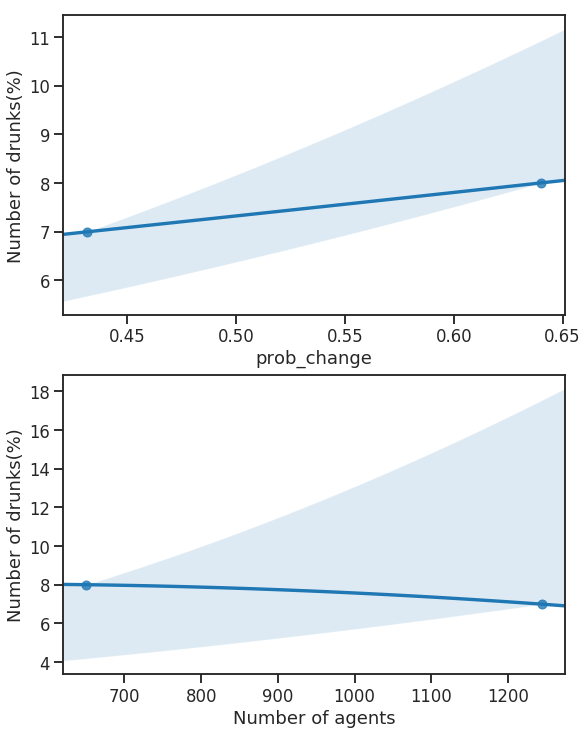

In [91]:
#sbn.plt.rcParams["figure.figsize"] = (20,25)

sbn.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
fig.tight_layout()

plt.subplot(211)
sbn.regplot(x=prob_changes, y=num_drunks_all, scatter=True, order=2)
plt.ylabel("Number of drunks(%)")
plt.xlabel("prob_change")


plt.subplot(212)
sbn.regplot(x=num_agents, y=num_drunks_all, scatter=True, order=2)
plt.ylabel("Number of drunks(%)")
plt.xlabel("Number of agents")






/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

Text(0.5,0,'Number of males')

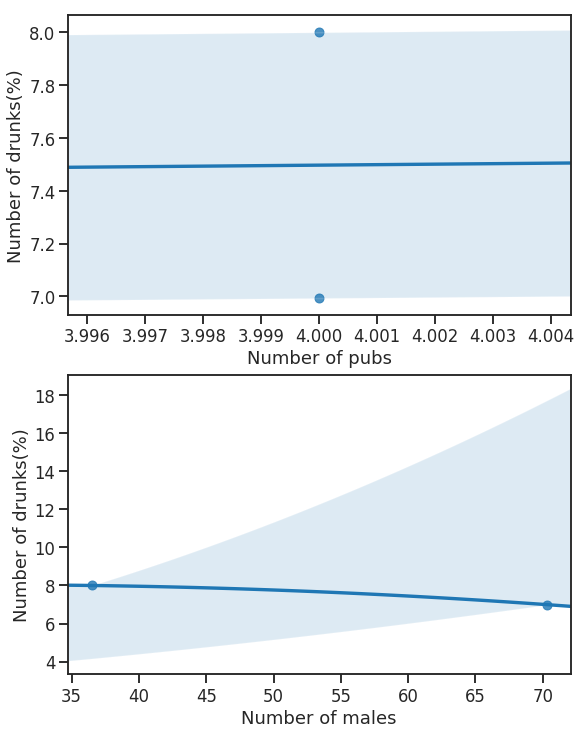

In [92]:
sbn.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
fig.tight_layout()

plt.subplot(211)
sbn.regplot(x=number_pubs, y=num_drunks_all, scatter=True, order=2)
plt.ylabel("Number of drunks(%)")
plt.xlabel("Number of pubs")

plt.subplot(212)
sbn.regplot(x=weight_male, y=num_drunks_all, scatter=True, order=2)
plt.ylabel("Number of drunks(%)")
plt.xlabel("Number of males")

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

Text(0.5,0,'Number of agents')

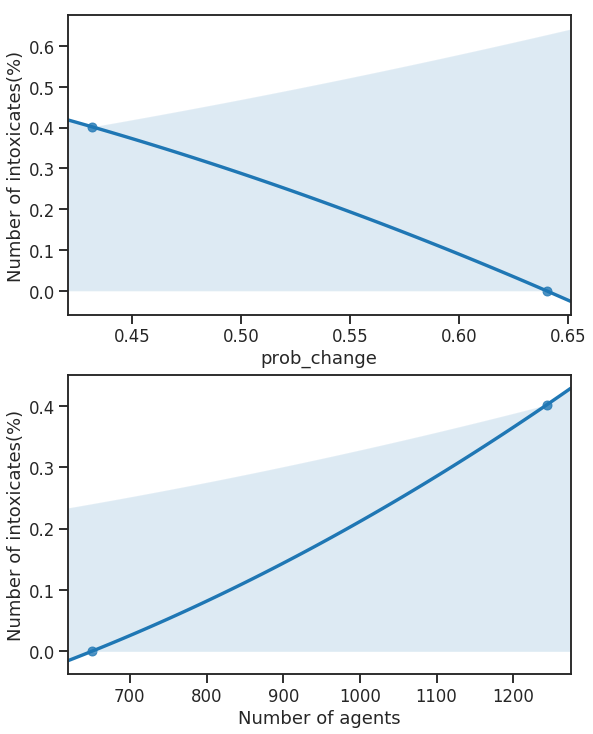

In [93]:
sbn.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
fig.tight_layout()

plt.subplot(211)
sbn.regplot(x=prob_changes, y=num_intoxicates_all, scatter=True, order=2)
plt.ylabel("Number of intoxicates(%)")
plt.xlabel("prob_change")


plt.subplot(212)
sbn.regplot(x=num_agents, y=num_intoxicates_all, scatter=True, order=2)
plt.ylabel("Number of intoxicates(%)")
plt.xlabel("Number of agents")

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

Text(0.5,0,'Number of males')

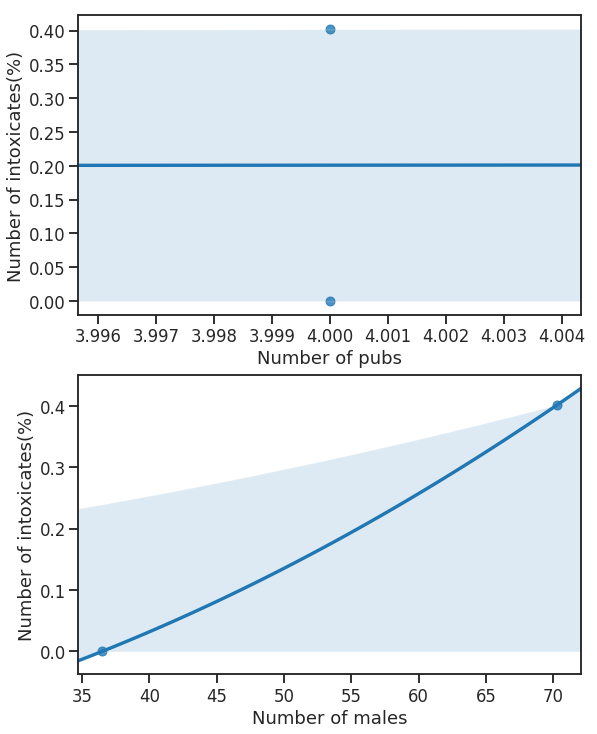

In [94]:
sbn.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
fig.tight_layout()

plt.subplot(211)
sbn.regplot(x=number_pubs, y=num_intoxicates_all, scatter=True, order=2)
plt.ylabel("Number of intoxicates(%)")
plt.xlabel("Number of pubs")

plt.subplot(212)
sbn.regplot(x=weight_male, y=num_intoxicates_all, scatter=True, order=2)
plt.ylabel("Number of intoxicates(%)")
plt.xlabel("Number of males")

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

Text(0.5,0,'Number of agents')

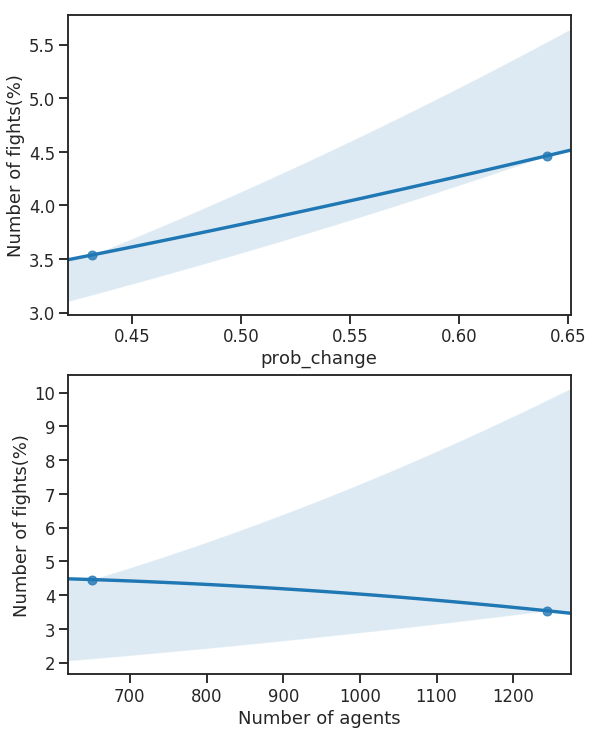

In [95]:
sbn.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
fig.tight_layout()

plt.subplot(211)
sbn.regplot(x=prob_changes, y=num_fights_all, scatter=True, order=2)
plt.ylabel("Number of fights(%)")
plt.xlabel("prob_change")


plt.subplot(212)
sbn.regplot(x=num_agents, y=num_fights_all, scatter=True, order=2)
plt.ylabel("Number of fights(%)")
plt.xlabel("Number of agents")

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr

Text(0.5,0,'Number of males')

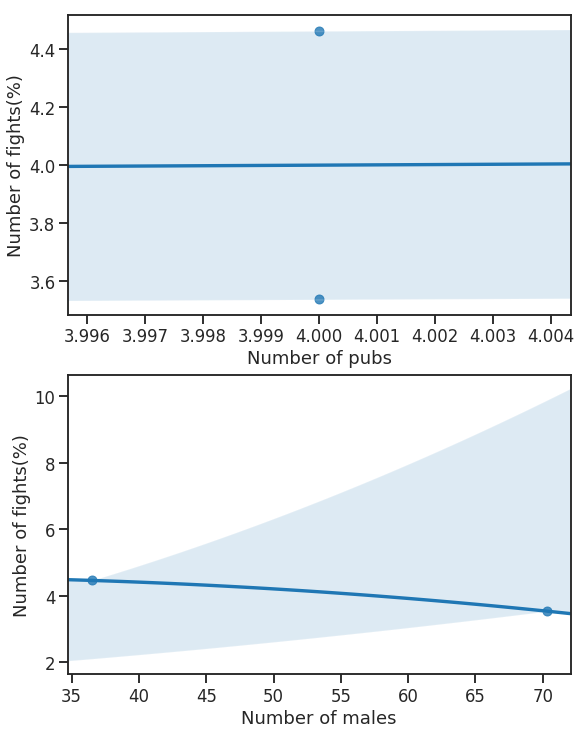

In [96]:
sbn.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,10)
fig.tight_layout()

plt.subplot(211)
sbn.regplot(x=number_pubs, y=num_fights_all, scatter=True, order=2)
plt.ylabel("Number of fights(%)")
plt.xlabel("Number of pubs")

plt.subplot(212)
sbn.regplot(x=weight_male, y=num_fights_all, scatter=True, order=2)
plt.ylabel("Number of fights(%)")
plt.xlabel("Number of males")

# MORRIS


In [97]:
from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp

In [98]:
morris_problem = {
    # There are 5 variables
    'num_vars': 4,
    # These are their names
    'names': [  'prob_changes',
                'num_agents',
                'number_pubs',
                'weight_male'
               
               
             ],
    # Plausible ranges over which we'll move the variables
    'bounds': [[0.1, 0.8],  
               [500,1500 ],  
               [2, 7],  
               [10, 90]  
               
              ],
    # I don't want to group any of these variables together
    'groups': None
    }
morris_problem

{'bounds': [[0.1, 0.8], [500, 1500], [2, 7], [10, 90]],
 'groups': None,
 'names': ['prob_changes', 'num_agents', 'number_pubs', 'weight_male'],
 'num_vars': 4}

In [99]:
number_of_trajectories = 1
sample = ms.sample(morris_problem, number_of_trajectories, num_levels=4)

In [100]:
#sample.T[0] tiene todos los valores de  prob_changes
#sample.T[1] tiene todos los valores de  num_agents
sample.T

array([[1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 5.66666667e-01,
        5.66666667e-01],
       [8.33333333e+02, 8.33333333e+02, 8.33333333e+02, 8.33333333e+02,
        1.50000000e+03],
       [7.00000000e+00, 3.66666667e+00, 3.66666667e+00, 3.66666667e+00,
        3.66666667e+00],
       [3.66666667e+01, 3.66666667e+01, 9.00000000e+01, 9.00000000e+01,
        9.00000000e+01]])

In [102]:
monte_carlo_large(sample.T,'morris')

Running simulation 0 ...
Running simulation 1 ...
Running simulation 2 ...
Running simulation 3 ...
Running simulation 4 ...
All simulations finished


In [106]:
len(sample.T[0])

5

In [109]:

num_drunks_all = []
num_intoxicates_all = []
num_fights_all = []

for i in range(len(sample.T[0])):
    
    data = analysis.read_csv('soil_output/Malasana_morris_{}/Malasana_morris_{}_trial_0.csv'.format(i,i), keys=None, convert_types=False)
    data_drunk = data['drunk']
    data_fights = data['num_of_fights']
    data_intoxicates = data['intoxicated']
    
    #Drunks
    num_drunks=0

    for column in data_drunk:
        for index, row in data_drunk.iterrows():
            if row[column]=='True':
                num_drunks+=1
                break
            
            
    
    num_drunks= (num_drunks/sample.T[1][i])*100
    num_drunks_all.append(num_drunks)
    
    
    #Fights
    num_fights=0

    for column in data_fights:
        for index, row in data_fights.iterrows():
            if row[column]=='1':
                num_fights+=1
                break
            
    num_fights= (num_fights/sample.T[1][i])*100       
    num_fights_all.append(num_fights)
    
    #Intoxicates
    num_intoxicates=0

    for column in data_intoxicates:
        for index, row in data_intoxicates.iterrows():
            if row[column]=='True':
                num_intoxicates+=1
                break
            
            
    
    num_intoxicates= (num_intoxicates/sample.T[1][i])*100
    num_intoxicates_all.append(num_intoxicates)
    
    #Hacer lo mismo con num_intoxicates_all y num_fights_all
    
    

In [111]:
num_intoxicates_all
num_drunks_all
num_fights_all

[5.28, 3.5999999999999996, 7.68, 6.4799999999999995, 2.933333333333333]

In [116]:
Si1 = ma.analyze(morris_problem, sample, np.array(num_drunks_all), print_to_console=False)
df = pd.DataFrame(data=list(zip(morris_problem['names'], Si1['mu'], Si1['mu_star'], Si1['sigma'])), 
                  columns=['Name', 'mu', 'mu_star', 'sigma'])
df.style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])

/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,Name,mu,mu_star,sigma
0,prob_changes,-1.08,1.08,nan
1,num_agents,-4.82,4.82,nan
2,number_pubs,8.82,8.82,nan
3,weight_male,-1.44,1.44,nan


In [117]:
Si2 = ma.analyze(morris_problem, sample, np.array(num_intoxicates_all), print_to_console=False)
df = pd.DataFrame(data=list(zip(morris_problem['names'], Si2['mu'], Si2['mu_star'], Si2['sigma'])), 
                  columns=['Name', 'mu', 'mu_star', 'sigma'])
df.style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])

/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,Name,mu,mu_star,sigma
0,prob_changes,-0.54,0.54,nan
1,num_agents,0.2,0.2,nan
2,number_pubs,0,0,nan
3,weight_male,-0.18,0.18,nan


In [118]:
Si3 = ma.analyze(morris_problem, sample, np.array(num_fights_all), print_to_console=False)
df = pd.DataFrame(data=list(zip(morris_problem['names'], Si3['mu'], Si3['mu_star'], Si3['sigma'])), 
                  columns=['Name', 'mu', 'mu_star', 'sigma'])
df.style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])

/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,Name,mu,mu_star,sigma
0,prob_changes,-1.8,1.8,nan
1,num_agents,-5.32,5.32,nan
2,number_pubs,2.52,2.52,nan
3,weight_male,6.12,6.12,nan


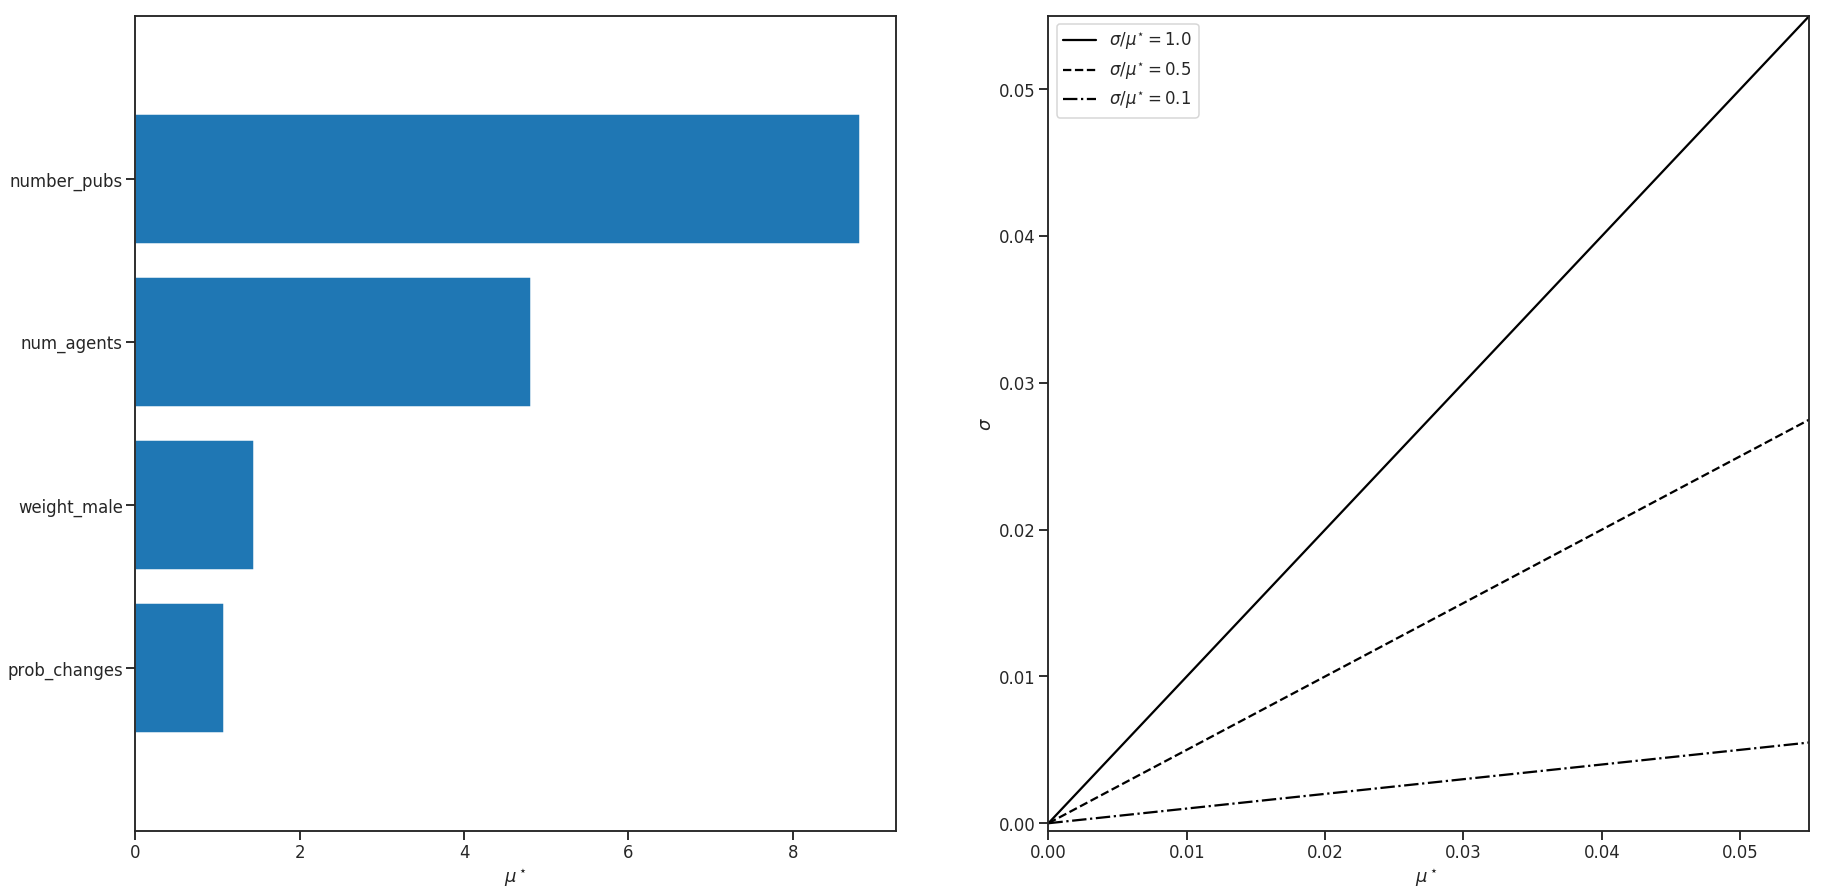

In [119]:
plt.rcParams["figure.figsize"] = (30,15)
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si1, {})
mp.covariance_plot(ax2, Si1, {})

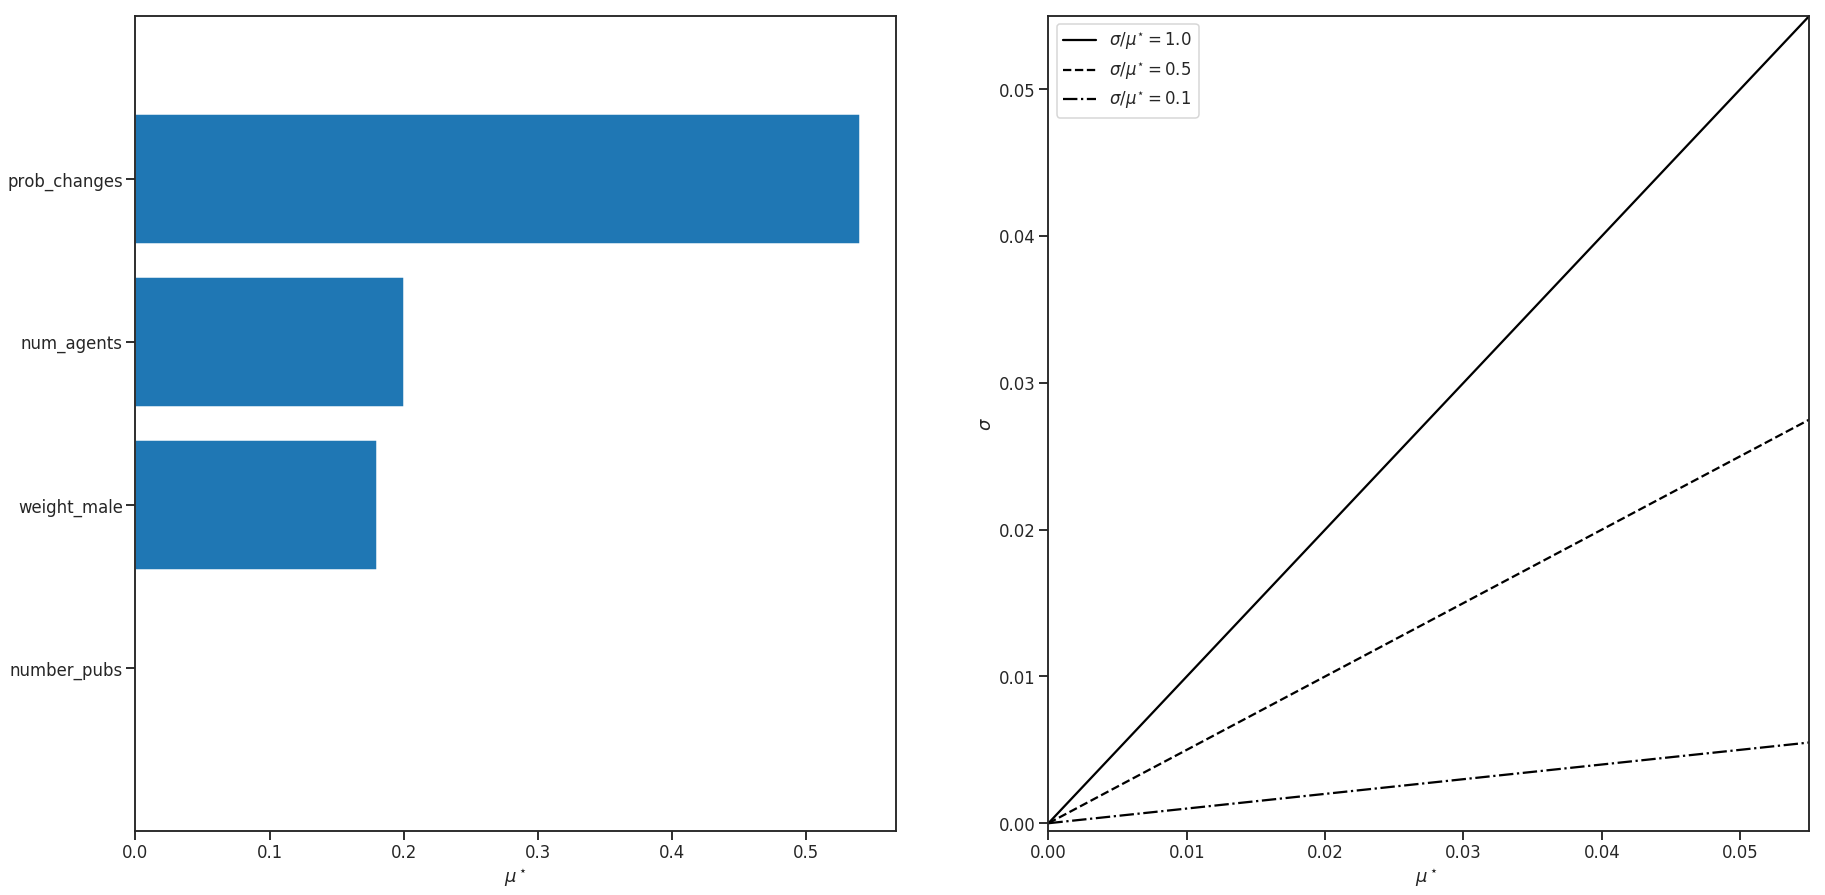

In [120]:
plt.rcParams["figure.figsize"] = (30,15)
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si2, {})
mp.covariance_plot(ax2, Si2, {})

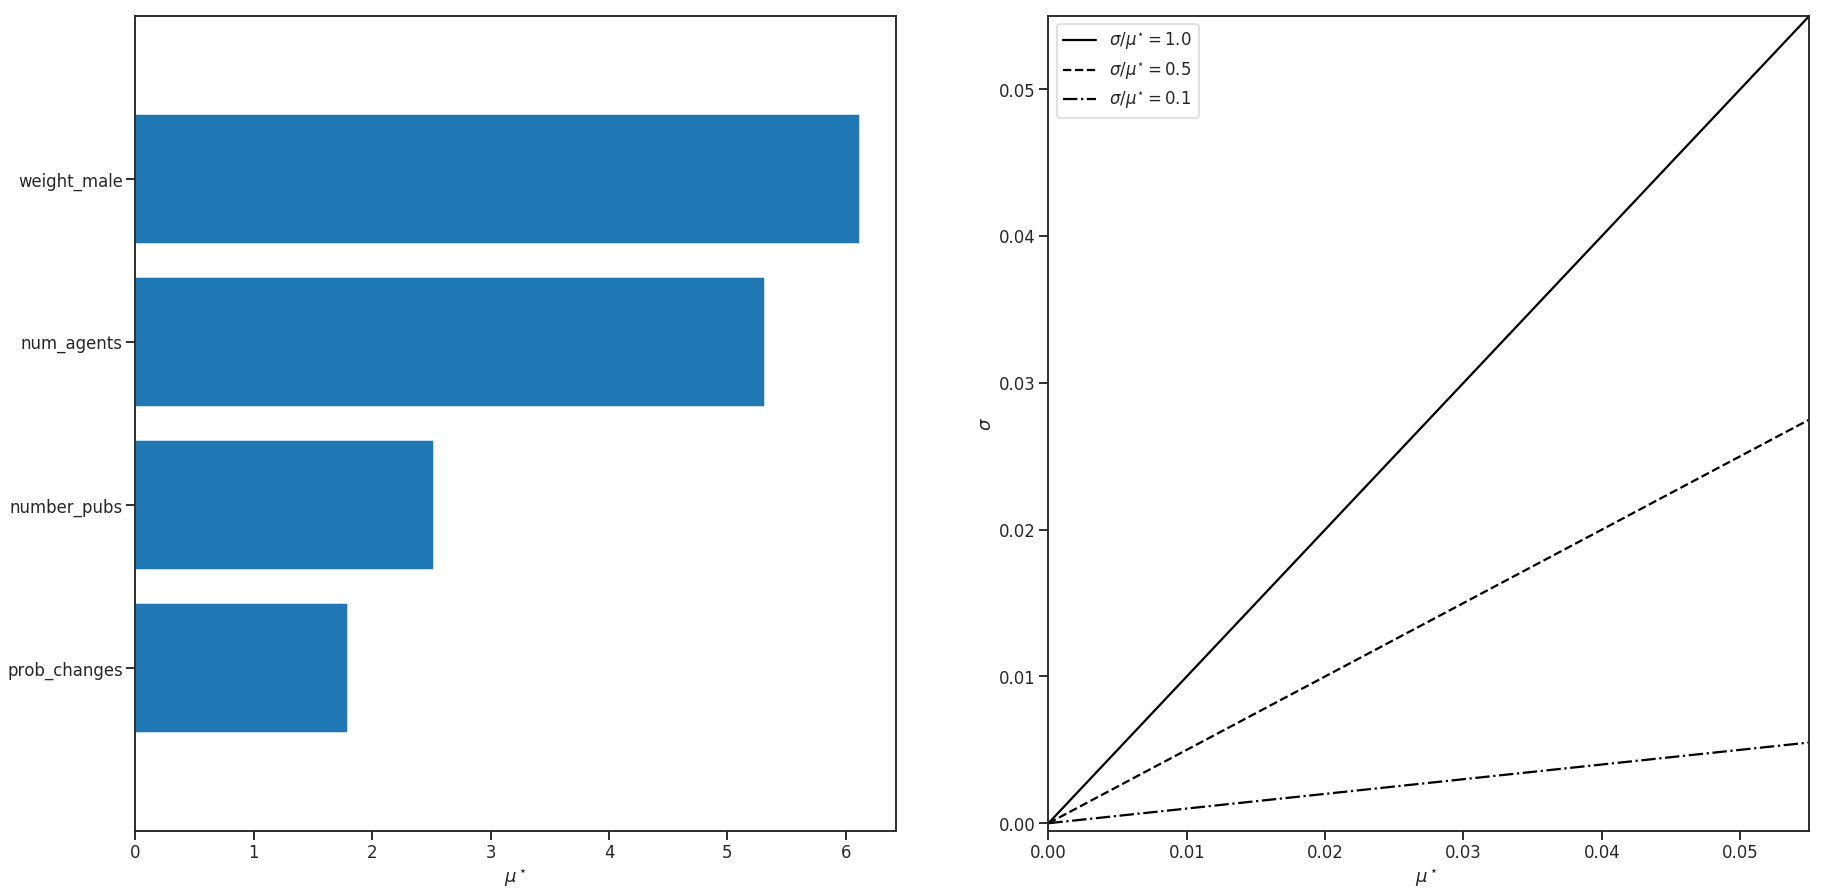

In [121]:
plt.rcParams["figure.figsize"] = (30,15)
fig, (ax1, ax2) = plt.subplots(1,2)
mp.horizontal_bar_plot(ax1, Si3, {})
mp.covariance_plot(ax2, Si3, {})

Name                      mu mu_star   sigma
prob_changes         -  1.08    1.08     nan
num_agents           -  4.82    4.82     nan
number_pubs             8.82    8.82     nan
weight_male          -  1.44    1.44     nan


/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alberto/.local/lib/python3.5/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


{'mu': array([-1.08, -4.82,  8.82, -1.44]),
 'mu_star': array([1.08, 4.82, 8.82, 1.44]),
 'mu_star_conf': [8.708343833293967e-16,
  1.7416687666587934e-15,
  3.483337533317587e-15,
  8.708343833293967e-16],
 'names': ['prob_changes', 'num_agents', 'number_pubs', 'weight_male'],
 'sigma': array([nan, nan, nan, nan])}